<a href="https://colab.research.google.com/github/kingcodes02/Time-Series-Forcasting/blob/main/01%20-%20Visualization_Time_Series_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.python.framework.config import list_physical_devices
# Import TensorFlow into Colab
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

# Check for GPU availability
print("GPU", "available (YESSSS!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version: 2.8.2
TF Hub version: 0.12.0
GPU available (YESSSS!!!!!)


In [2]:
import os
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [9]:
os.chdir("/content/drive/MyDrive/visulization-data-copy")

###Loading Data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
 # load the data using pandas
df = pd.read_excel("/content/drive/MyDrive/visulization-data-copy/Debourgh-Sales.xlsx", sheet_name="Sheet2")

In [14]:
df.head()

,Years,Sales
0,2001-01-01,139.7
1,2001-02-01,114.3
2,2001-03-01,101.6
3,2001-04-01,152.4
4,2001-05-01,215.9


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Years   108 non-null    datetime64[ns]
 1   Sales   108 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


##Line Plot - using Seaborn library

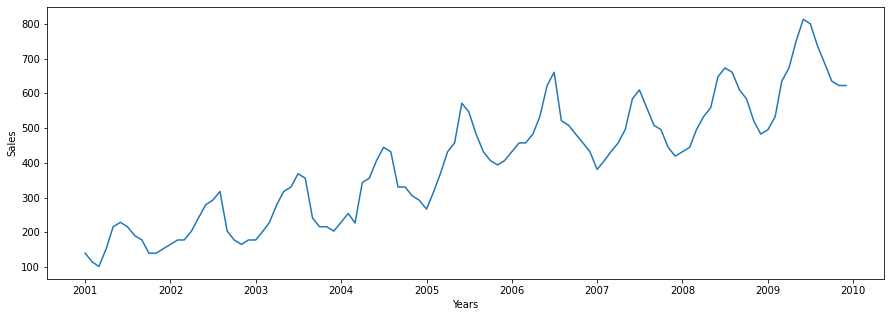

In [20]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Years', y='Sales', data=df,);

###Another Line Plot - using python library


In [21]:
# Before applying the line plot, the index needs to be reset. 
df1 = df.set_index('Years')
df1

,Sales
Years,
2001-01-01,139.7
2001-02-01,114.3
2001-03-01,101.6
2001-04-01,152.4
2001-05-01,215.9
...,...
2009-08-01,736.6
2009-09-01,685.5
2009-10-01,635.0


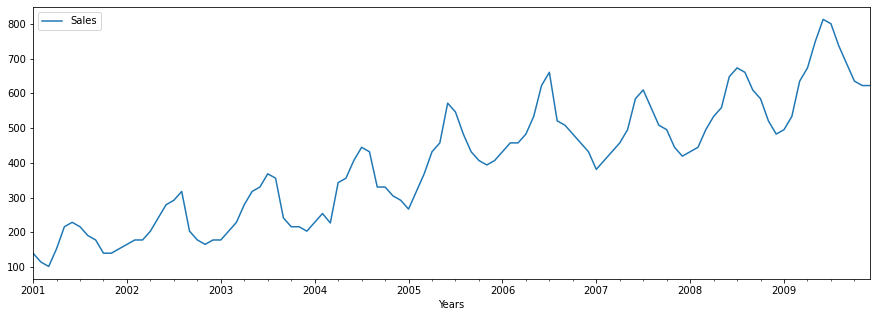

In [26]:
fig, ax = plt.subplots(figsize=(15,5))
df1.plot(kind='line', ax=ax);

In [32]:
df['year'] = df['Years'].dt.year
df['quarter'] = df['Years'].dt.quarter

In [33]:
df.head()

,Years,Sales,year,quarter
0,2001-01-01,139.7,2001,1
1,2001-02-01,114.3,2001,1
2,2001-03-01,101.6,2001,1
3,2001-04-01,152.4,2001,2
4,2001-05-01,215.9,2001,2


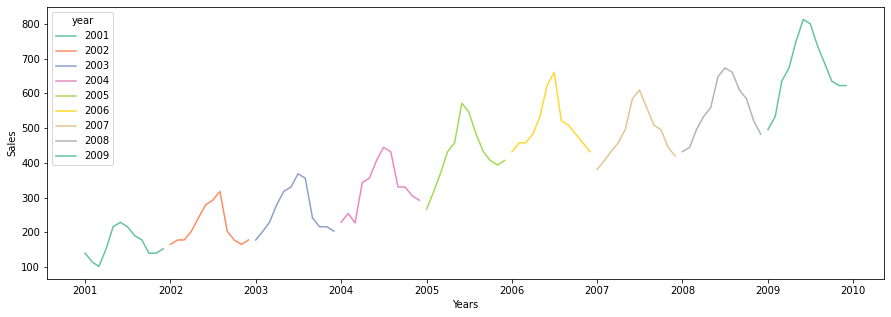

In [35]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Years', y='Sales', data=df, hue='year', palette='Set2');

###Area Plot

In [36]:
df

,Years,Sales,year,quarter
0,2001-01-01,139.7,2001,1
1,2001-02-01,114.3,2001,1
2,2001-03-01,101.6,2001,1
3,2001-04-01,152.4,2001,2
4,2001-05-01,215.9,2001,2
...,...,...,...,...
103,2009-08-01,736.6,2009,3
104,2009-09-01,685.5,2009,3
105,2009-10-01,635.0,2009,4
106,2009-11-01,622.3,2009,4


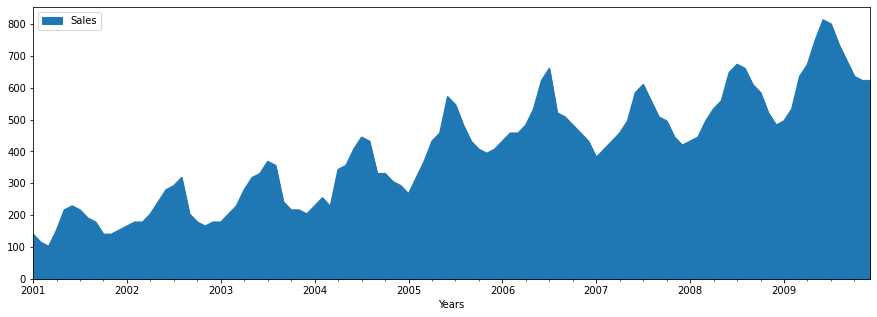

In [37]:
fig, ax = plt.subplots(figsize=(15,5))
df1.plot(kind='area', ax=ax);

###Bar Plot - using Seaborn library

In [41]:
df_year = df[['Sales', 'year']].groupby(by='year').sum().reset_index()

In [42]:
df_year

,year,Sales
0,2001,1968.5
1,2002,2577.8
2,2003,3136.9
3,2004,3947.8
4,2005,5080.0
5,2006,6045.2
6,2007,5791.2
7,2008,6642.1
8,2009,8000.7


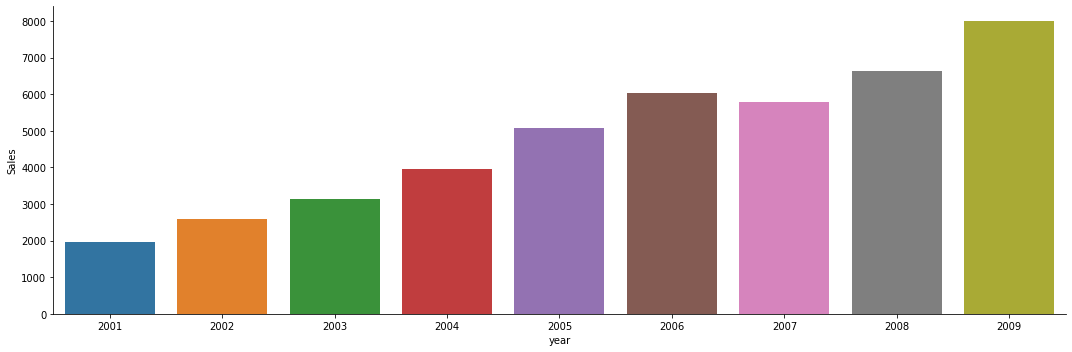

In [48]:
sns.catplot(x='year', y='Sales', data=df_year, kind='bar', aspect=3);

###Bar Plot - using Pandas library

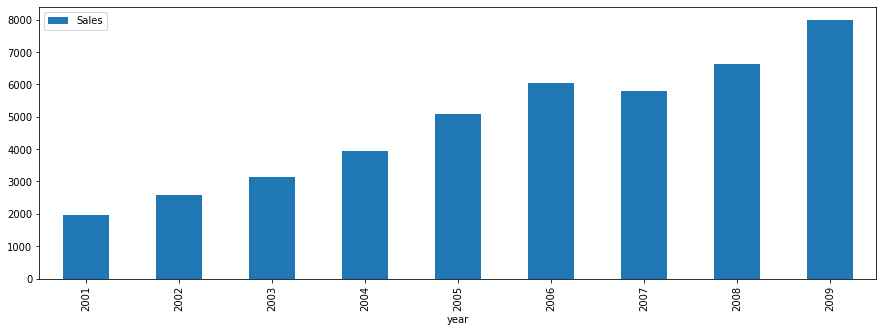

In [51]:
fig, ax = plt.subplots(figsize=(15,5))
df_year.set_index('year').plot(kind='bar', ax=ax);

###Stacked bar plot

In [55]:
sales = df[['Sales', 'year', 'quarter']].groupby(by=['year', 'quarter']).sum().values

In [56]:
sales.shape

(36, 1)

9 years and each year has 4 quarter

In [ ]:
sales

In [ ]:
sales.reshape(9, 4)

In [65]:
df_sales = pd.DataFrame(sales.reshape(9, 4), index=list(range(2001, 2010)), columns=['Q1', 'Q2', 'Q3', 'Q4'])

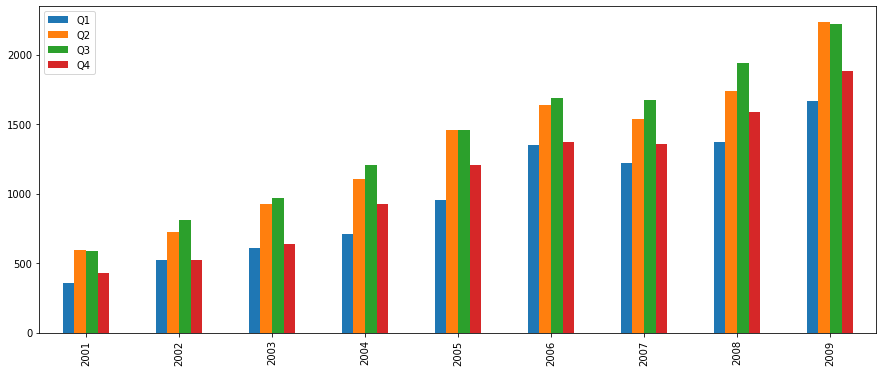

In [69]:
# Create the stacked bar plot
fiq, ax = plt.subplots(figsize=(15, 6))
df_sales.plot(kind='bar', ax=ax);

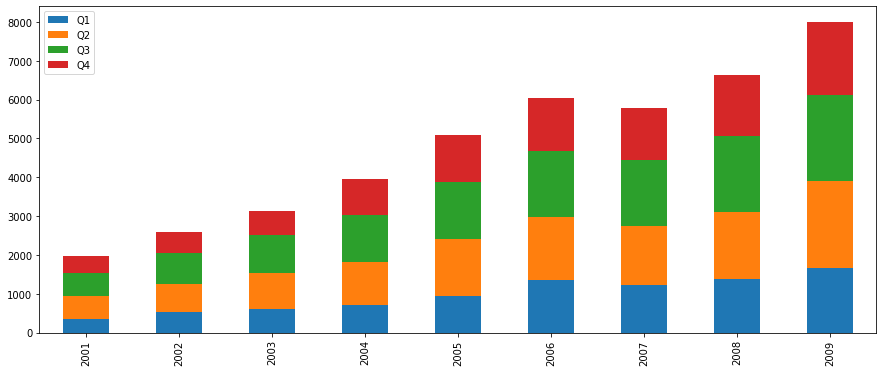

In [70]:
fiq, ax = plt.subplots(figsize=(15, 6))
df_sales.plot(kind='bar', ax=ax, stacked=True);

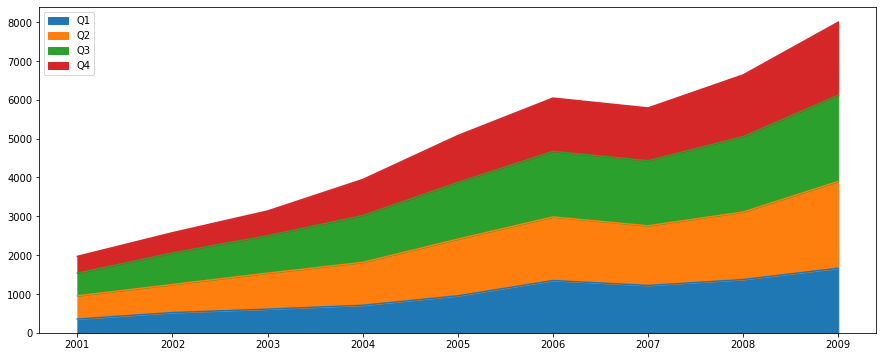

In [72]:
fiq, ax = plt.subplots(figsize=(15, 6))
df_sales.plot(kind='area', ax=ax, stacked=True);

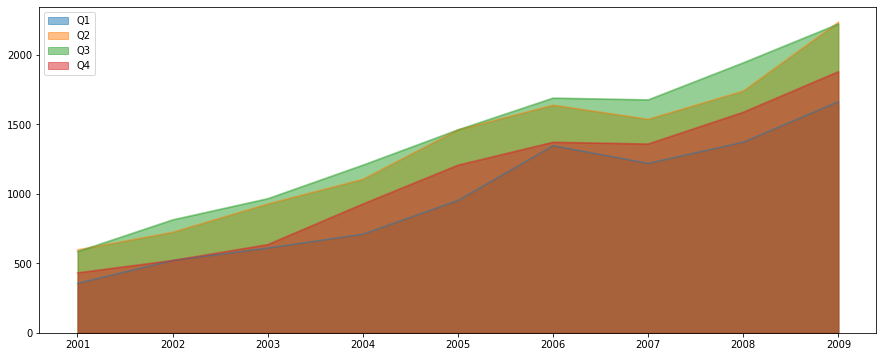

In [73]:
fiq, ax = plt.subplots(figsize=(15, 6))
df_sales.plot(kind='area', ax=ax, stacked=False);

### Heatmap

In [74]:
df_sales

,Q1,Q2,Q3,Q4
2001,355.6,596.9,584.2,431.8
2002,520.7,723.6,812.8,520.7
2003,609.6,927.1,965.2,635.0
2004,709.3,1104.9,1206.5,927.1
2005,952.5,1460.5,1460.5,1206.5
2006,1346.2,1638.3,1689.1,1371.6
2007,1219.2,1536.7,1676.4,1358.9
2008,1371.6,1739.9,1943.1,1587.5
2009,1663.7,2235.2,2222.2,1879.6


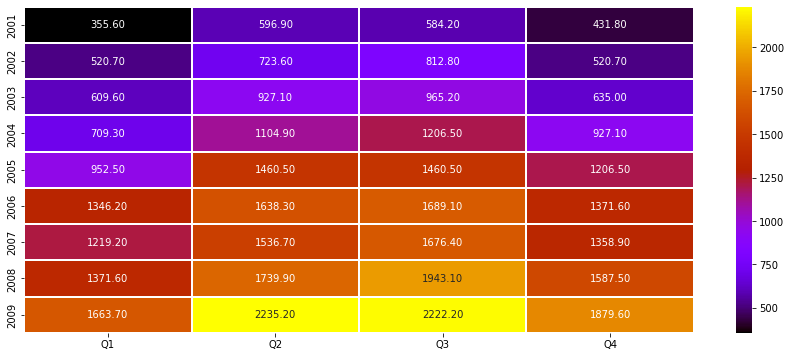

In [85]:
plt.figure(figsize=(15, 6))
sns.heatmap(df_sales, annot=True, fmt='.2f', cmap='gnuplot', linewidths=1);